# Milestone 1 - Data Visualization Complementary Views 

## Author - Michael Rojas

## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g., small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Load data and get general feel for it

In [35]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [3]:
headcount_df.shape

(175677, 9)

In [4]:
headcount_df.dtypes

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object

In [5]:
headcount_df.head()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47


In [6]:
headcount_df.tail()

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
175672,WR,10/31/2011,19,0,0,1,0,2,92
175673,WR,10/31/2011,20,1,1,0,1,2,92
175674,WR,10/31/2011,21,0,1,0,0,2,92
175675,WR,10/31/2011,22,1,1,0,1,2,92
175676,WR,10/31/2011,23,0,1,0,0,2,92


In [7]:
headcount_df.GameCode.value_counts()

RR    8778
CR    8778
MR    8778
UT    8778
PA    8778
PG    8778
S6    8778
ND    8778
MQ    8778
TP    8778
DH    8778
TH    8778
LI    8778
C4    8778
RO    8778
WR    8778
SH    8778
FP    8778
TL    8778
MI    8630
MS     147
BA     118
Name: GameCode, dtype: int64

In [8]:
# Look at the correlation between variables
cor_headcount = headcount_df.corr()

In [9]:
cor_headcount

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
Hour,1.000000,0.150271,0.134911,-0.165562,0.171027,-0.000641,-0.000149
TablesOcc,0.150271,1.000000,0.973488,0.091488,0.932536,0.029641,0.020292
TablesOpen,0.134911,0.973488,1.000000,0.124094,0.889106,0.031448,0.029192
TablesClosed,-0.165562,0.091488,0.124094,1.000000,0.043878,-0.038390,-0.028820
HeadCount,0.171027,0.932536,0.889106,0.043878,1.000000,0.031059,0.014838
DayOfWeek,-0.000641,0.029641,0.031448,-0.038390,0.031059,1.000000,-0.002442
DayNumber,-0.000149,0.020292,0.029192,-0.028820,0.014838,-0.002442,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

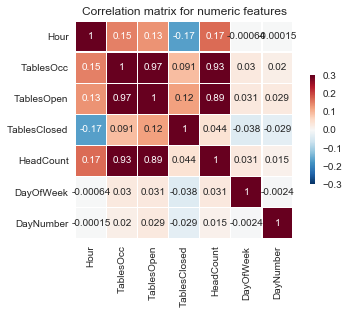

In [10]:
sns.heatmap(cor_headcount, vmax=.3, center=0, annot=True,
            square=True, linewidths=.25, cbar_kws={'shrink':.5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

Some of these correlations do not make sense like the fact that Tables Occupied is highly correlated with Tables Open. Head Count is highly correlated with Tables Occupied also makes sense. 

In [12]:
num_cols = headcount_df.select_dtypes(include=['int64']).columns.unique()
num_cols

Index(['Hour', 'TablesOcc', 'TablesOpen', 'TablesClosed', 'HeadCount',
       'DayOfWeek', 'DayNumber'],
      dtype='object')

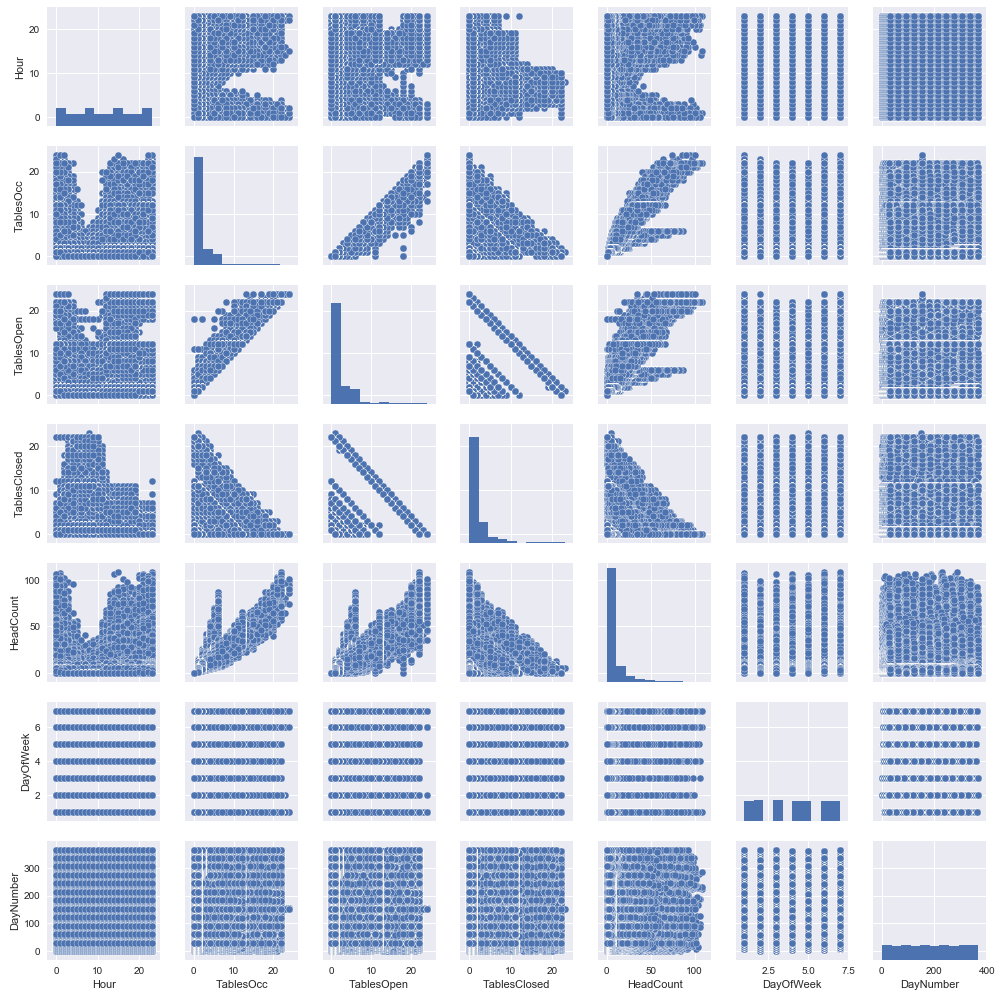

In [15]:
# Plotting pair wise scatter plots
sns.pairplot(headcount_df.loc[:,num_cols], palette='seismic',
             diag_kind='hist', size=2)

Headcount has a left skew, same with Tables closed, tables opened, and tables occupied. Head count has the same patter for tables opene dand tables occupied. 

## Starting to look at the relationships amongst different features

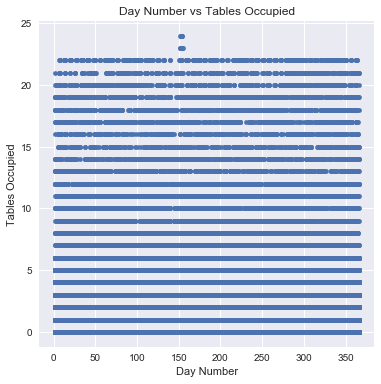

In [48]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'DayNumber', y = 'TablesOcc', ax = ax)
ax.set_title('Day Number vs Tables Occupied') # Give the plot a main title
ax.set_ylabel('Tables Occupied')# Set text for y axis
ax.set_xlabel('Day Number')

There is a spike of the number of tables occupied a little after 150 or so, otherwise very uniform. This is very interesting. That is around the beginning of June. 

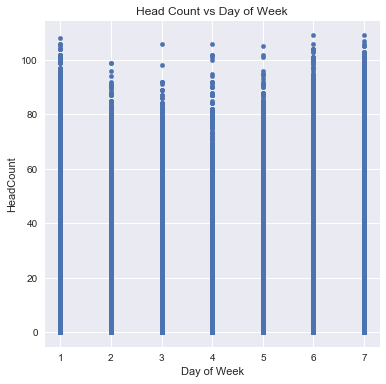

In [49]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'DayOfWeek', y = 'HeadCount', ax = ax)
ax.set_title('Head Count vs Day of Week') # Give the plot a main title
ax.set_ylabel('HeadCount')# Set text for y axis
ax.set_xlabel('Day of Week')
plt.show()

The day of the week with the lowest headcount is day 2. The days with the most look to be Friday, Saturday and Sunday.

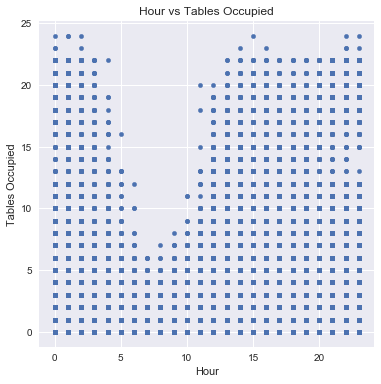

In [17]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'TablesOcc', ax = ax)
ax.set_title('Hour vs Tables Occupied') # Give the plot a main title
ax.set_ylabel('Tables Occupied')# Set text for y axis
ax.set_xlabel('Hour')

**Note**: there is a significant dip in the the tables occuppied between hours 5 and 10 am

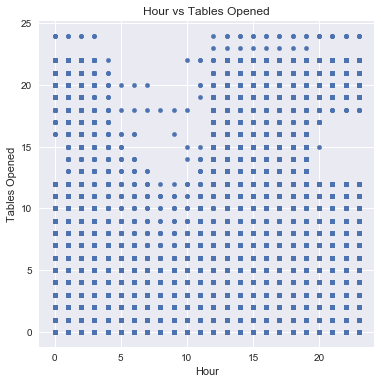

In [18]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'TablesOpen', ax = ax)
ax.set_title('Hour vs Tables Opened') # Give the plot a main title
ax.set_ylabel('Tables Opened')# Set text for y axis
ax.set_xlabel('Hour')

There is a dip in the number of tables opened between hours 5 and 10 am

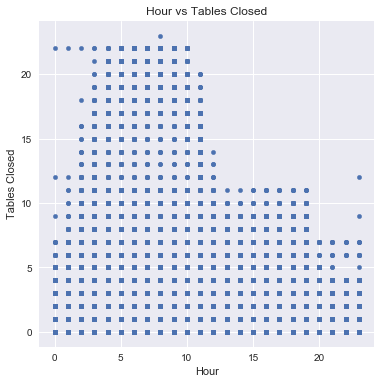

In [19]:
ax = plt.figure(figsize=(6, 6)).gca() # define axis
headcount_df.plot.scatter(x = 'Hour', y = 'TablesClosed', ax = ax)
ax.set_title('Hour vs Tables Closed') # Give the plot a main title
ax.set_ylabel('Tables Closed')# Set text for y axis
ax.set_xlabel('Hour')

The most tables closed are between ~3 and 10 am meanwhile, hours 20 (8pm) and onwards have the fewest tables closed. Seems like peak customer time. 

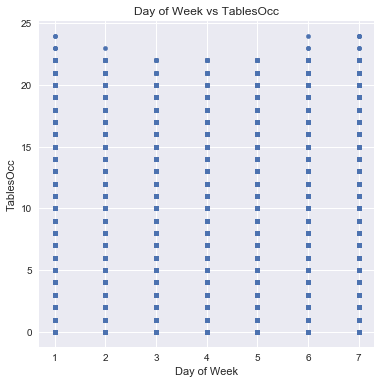

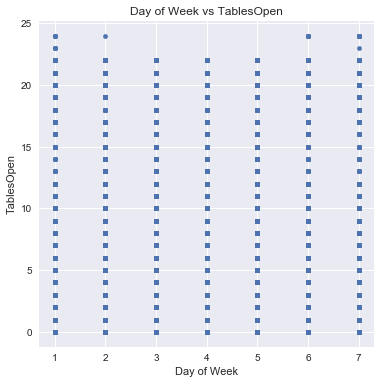

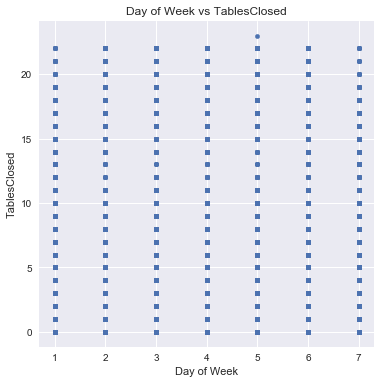

In [21]:
for col in ['TablesOcc', 'TablesOpen', 'TablesClosed']:
    ax = plt.figure(figsize=(6, 6)).gca() # define axis
    headcount_df.plot.scatter(x = 'DayOfWeek', y = col, ax = ax)
    ax.set_title('Day of Week vs {}'.format(col)) # Give the plot a main title
    ax.set_ylabel(col)# Set text for y axis
    ax.set_xlabel('Day of Week')
    plt.show()

Seems like the fewest tables are open and occupied on Tuesday, Wednesday or Thursday. But the difference is very small

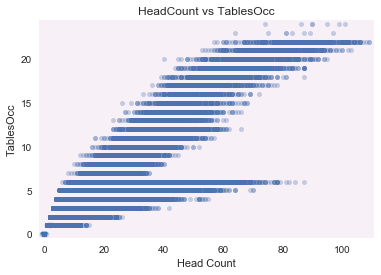

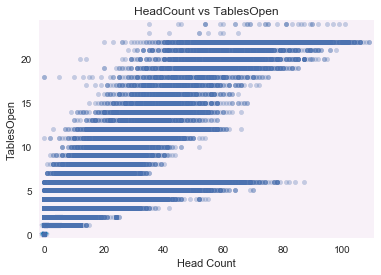

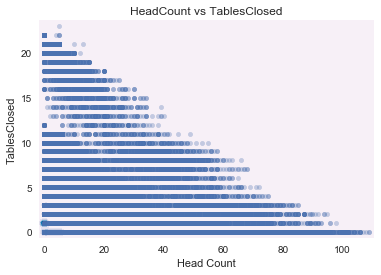

In [50]:
for col in ['TablesOcc', 'TablesOpen', 'TablesClosed']:
    ax = sns.kdeplot(headcount_df.loc[:,['HeadCount', col]], shade=True, cmap='PuBu')
    headcount_df.plot.scatter(x = 'HeadCount', y = col, ax = ax, alpha=.3)
    ax.set_title('HeadCount vs {}'.format(tbl)) # Give the plot a main title
    ax.set_ylabel(col)# Set text for y axis
    ax.set_xlabel('Head Count')
    plt.show()

Seems like the head count goes up when the number of tables occupied goes up. There is a spike of increased heada count around 5 tables occupied as well. 

As head count increases, the number of tables open also seems to go up, again with a spike of increased head count a little above 5. 

The last plot shows that as the head count increases, the number of tables closed decreases. This makes sense. The highest spike of head count occurs when there are very few to no tables closed.

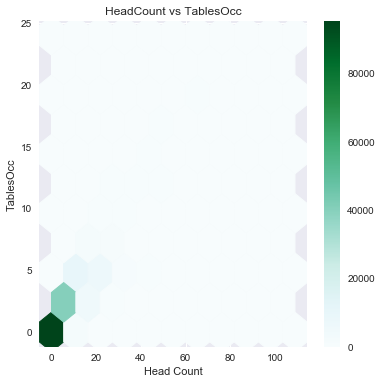

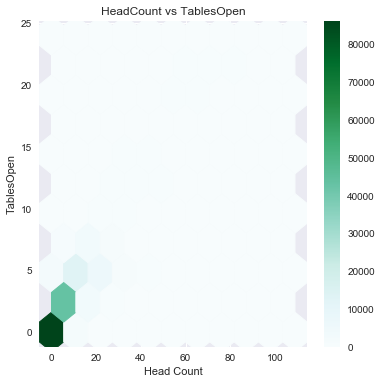

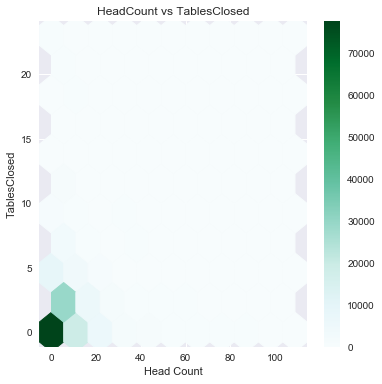

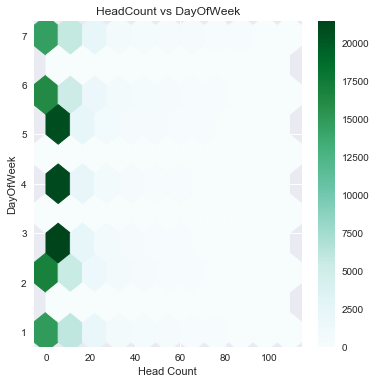

In [47]:
# Looking at hexbins for the same data
for col in ['TablesOcc', 'TablesOpen', 'TablesClosed', 'DayOfWeek']:
    ax = plt.figure(figsize=(6,6)).gca()
    headcount_df.plot.hexbin(x = 'HeadCount', y = tbl, ax = ax, gridsize=10)
    ax.set_title('HeadCount vs {}'.format(col)) # Give the plot a main title
    ax.set_ylabel(col)# Set text for y axis
    ax.set_xlabel('Head Count')
    plt.show()

Hexbin plots take much less time than do kde plots. Most of the data lies in the lower left corner of the plots. 

The most interesting plot is head count versus day of the week. The largest headcounts are on days 3, 4, and 5. 

GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64

### Create a time series like dataframe for some line plots

In [59]:
ts_headcount = headcount_df.copy()
ts_headcount['DateFormat'] = pd.to_datetime(ts_headcount.DateFormat,format='%m/%d/%Y')
ts_headcount.set_index('DateFormat', inplace=True)
ts_headcount.head()

,GameCode,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,HeadBin
DateFormat,,,,,,,,,
2011-09-16,BA,6,0,0,1,0,6,47,0
2011-09-16,BA,7,0,0,1,0,6,47,0
2011-09-16,BA,8,0,0,1,0,6,47,0
2011-09-16,BA,9,0,0,1,0,6,47,0
2011-09-16,BA,10,0,1,0,0,6,47,0


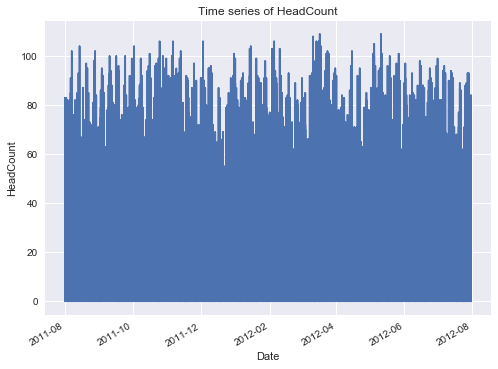

In [60]:
ax = plt.figure(figsize=(8, 6)).gca() # define axis
ts_headcount.loc[:,'HeadCount'].plot(ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('HeadCount')
ax.set_title('Time series of HeadCount')

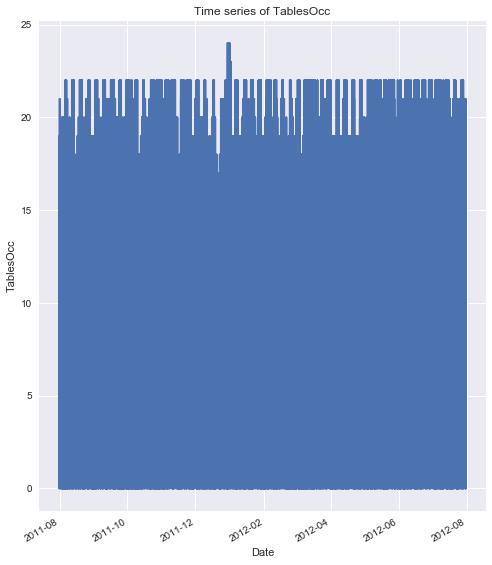

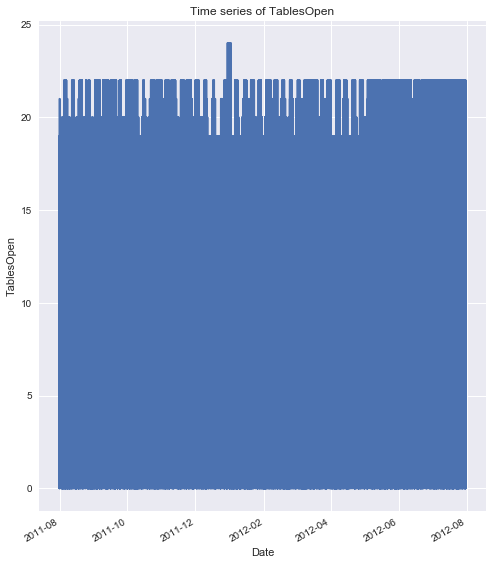

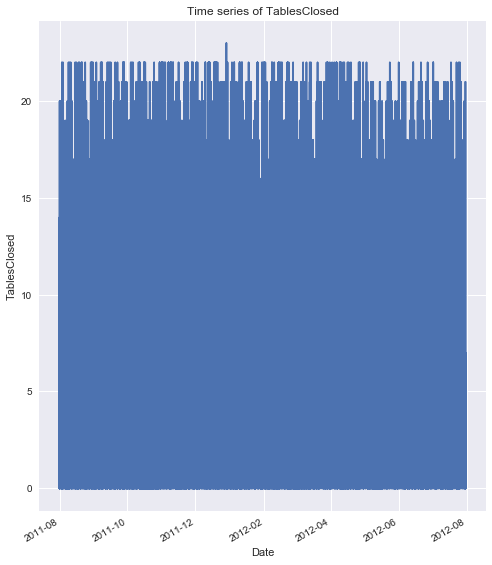

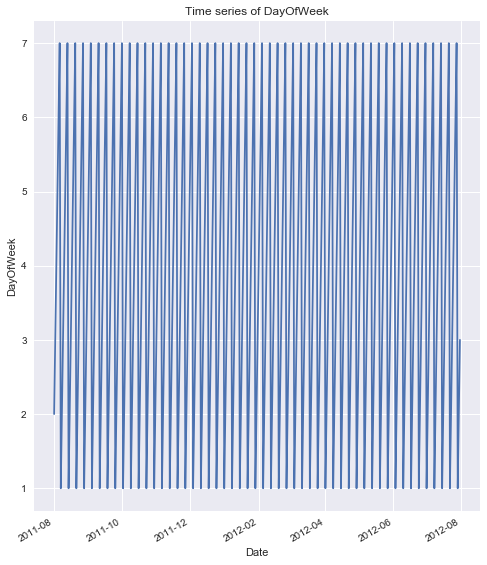

In [64]:
for col in ['TablesOcc', 'TablesOpen', 'TablesClosed', 'DayOfWeek']:
    ax = plt.figure(figsize=(8, 10)).gca() # define axis
    ts_headcount.loc[:,col].plot(ax = ax)
    ax.set_xlabel('Date')
    ax.set_ylabel(col)
    ax.set_title('Time series of {}'.format(col))

Based on the line plots, there is an uptick of tables occupied, tables open, and tables closed somewhere between December 2011 and February 2012. 

### Usings Aesthetics with the plots

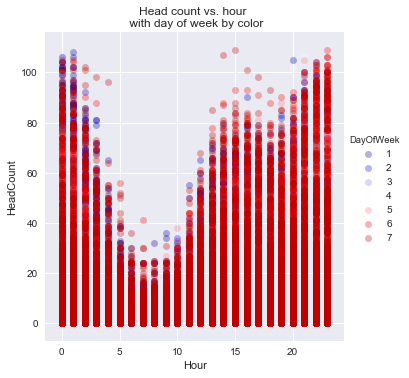

In [66]:
sns.lmplot(x = 'Hour', y = 'HeadCount', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('HeadCount')
plt.title('Head count vs. hour \n with day of week by color')

One thing to notice here in this plot is the abudnance of red points which correspond to Days later on in the week, specifically 5, 6 or 7. 

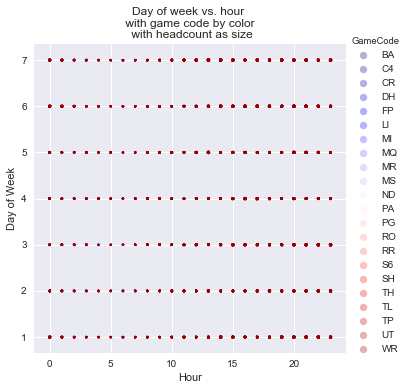

In [68]:
sns.lmplot(x = 'Hour', y = 'DayOfWeek', 
           data = headcount_df, 
           hue = "GameCode", 
           palette="seismic", 
           scatter_kws={'alpha':0.3,
                        's':headcount_df.loc[:,'HeadCount']},
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.title('Day of week vs. hour \n with game code by color \n with headcount as size')

Too many categories in this case to be helpful. 

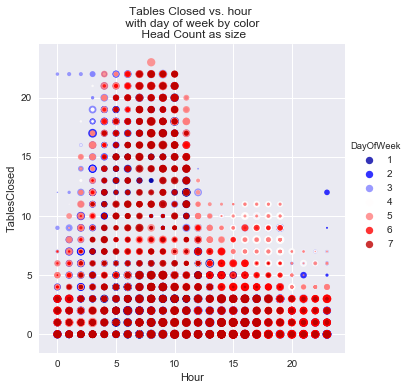

In [86]:
sns.lmplot(x = 'Hour', y = 'TablesClosed', 
           data = headcount_df, 
           hue = "DayOfWeek", 
           palette="seismic", 
           scatter_kws={'s':headcount_df.loc[:,'HeadCount']},
           fit_reg = False)
plt.xlabel('Hour')
plt.ylabel('TablesClosed')
plt.title('Tables Closed vs. hour \n with day of week by color \n Head Count as size')

Note the majority of red for the day of the weeks. Biggest size/head counts seem to have the fewest tables closed, that makes sense. Some of the smallest headcounts correspond to blue or light, red day of the week.

### Using Facet Grid plots

In [75]:
for c in headcount_df.columns.unique():
    print(c,headcount_df[c].nunique())

GameCode 22
DateFormat 366
Hour 24
TablesOcc 25
TablesOpen 25
TablesClosed 24
HeadCount 110
DayOfWeek 7
DayNumber 366
HeadBin 10


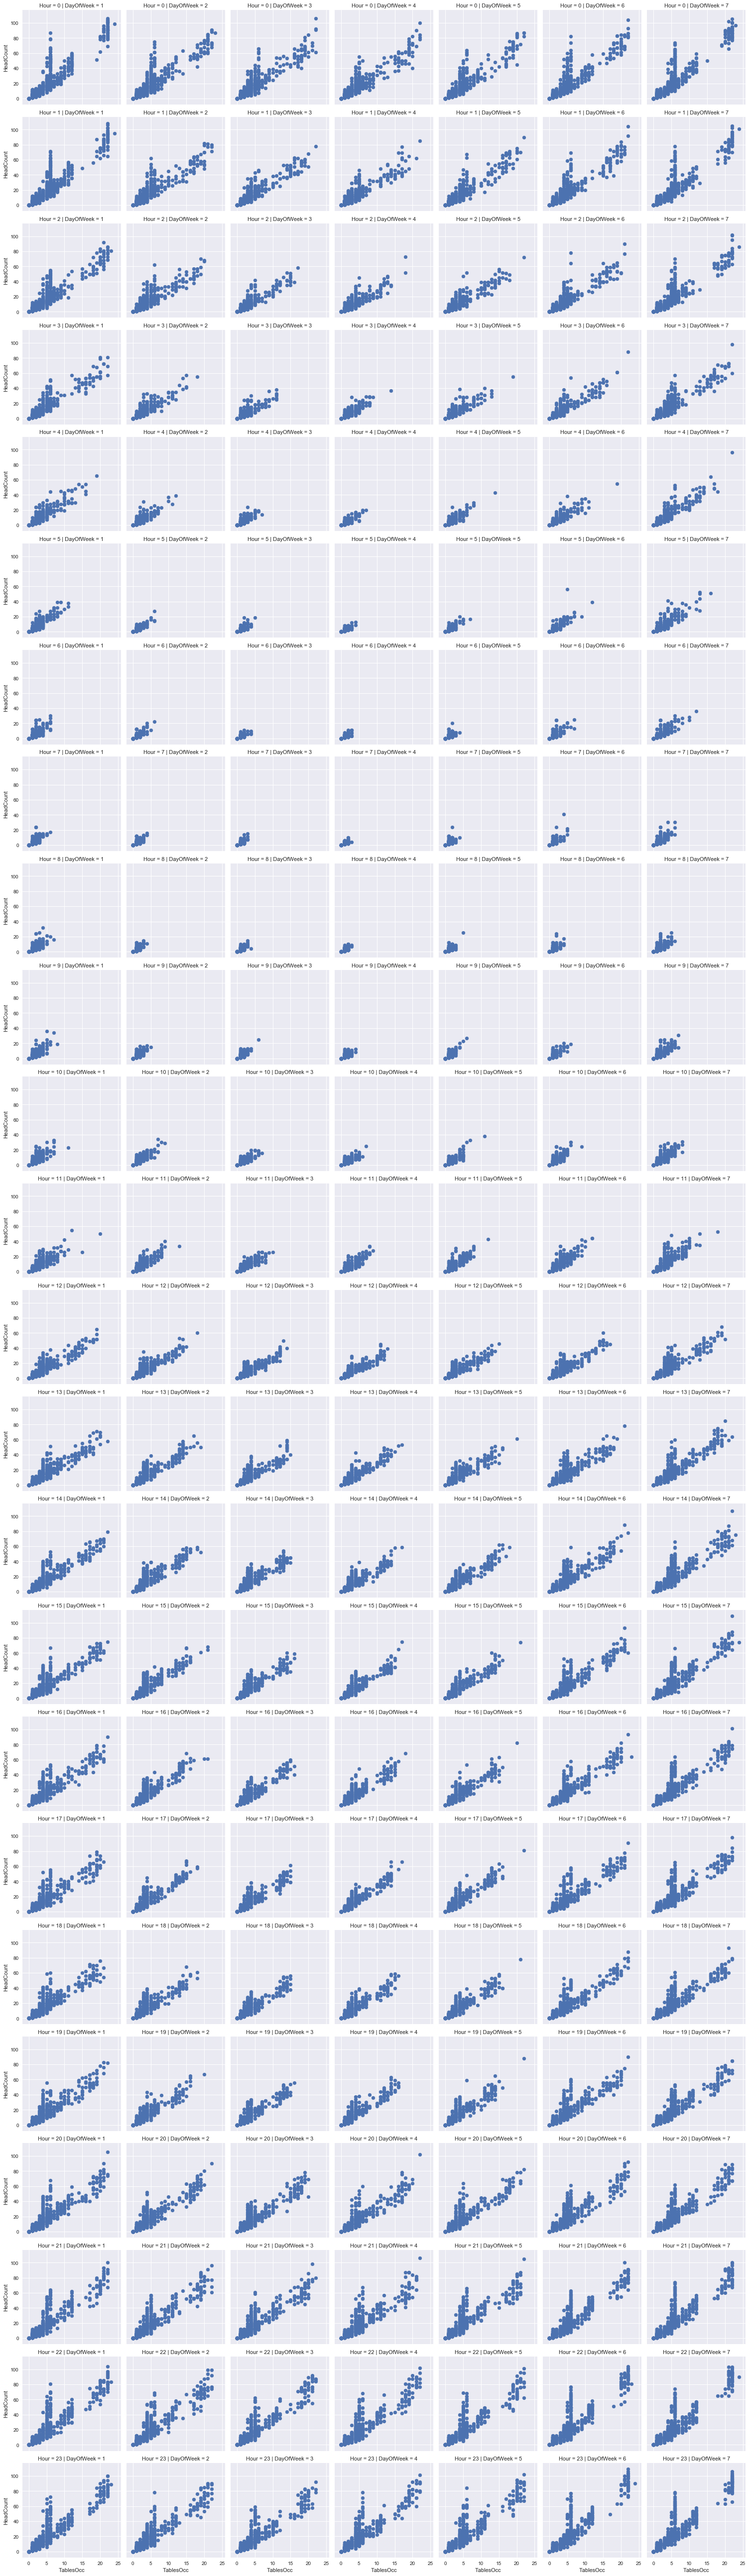

In [78]:
g = sns.FacetGrid(headcount_df, 
                  col="DayOfWeek", 
                  row='Hour', 
                  #hue="", 
                  palette="Set1")
g = g.map(plt.scatter, "TablesOcc", "HeadCount")

These plots are use 'day of week' as the different columns and 'hour' as the rows, also as the conditioning grids. It then plots the 'tables occupied' versus the 'head count'. Overall, seems to have a somewhat positive linear relationship per conditions with some slight deviations. It can be seen that in the morning, the headcount decreases and also increases mainly on the weekends. Those contain the highest counts. 

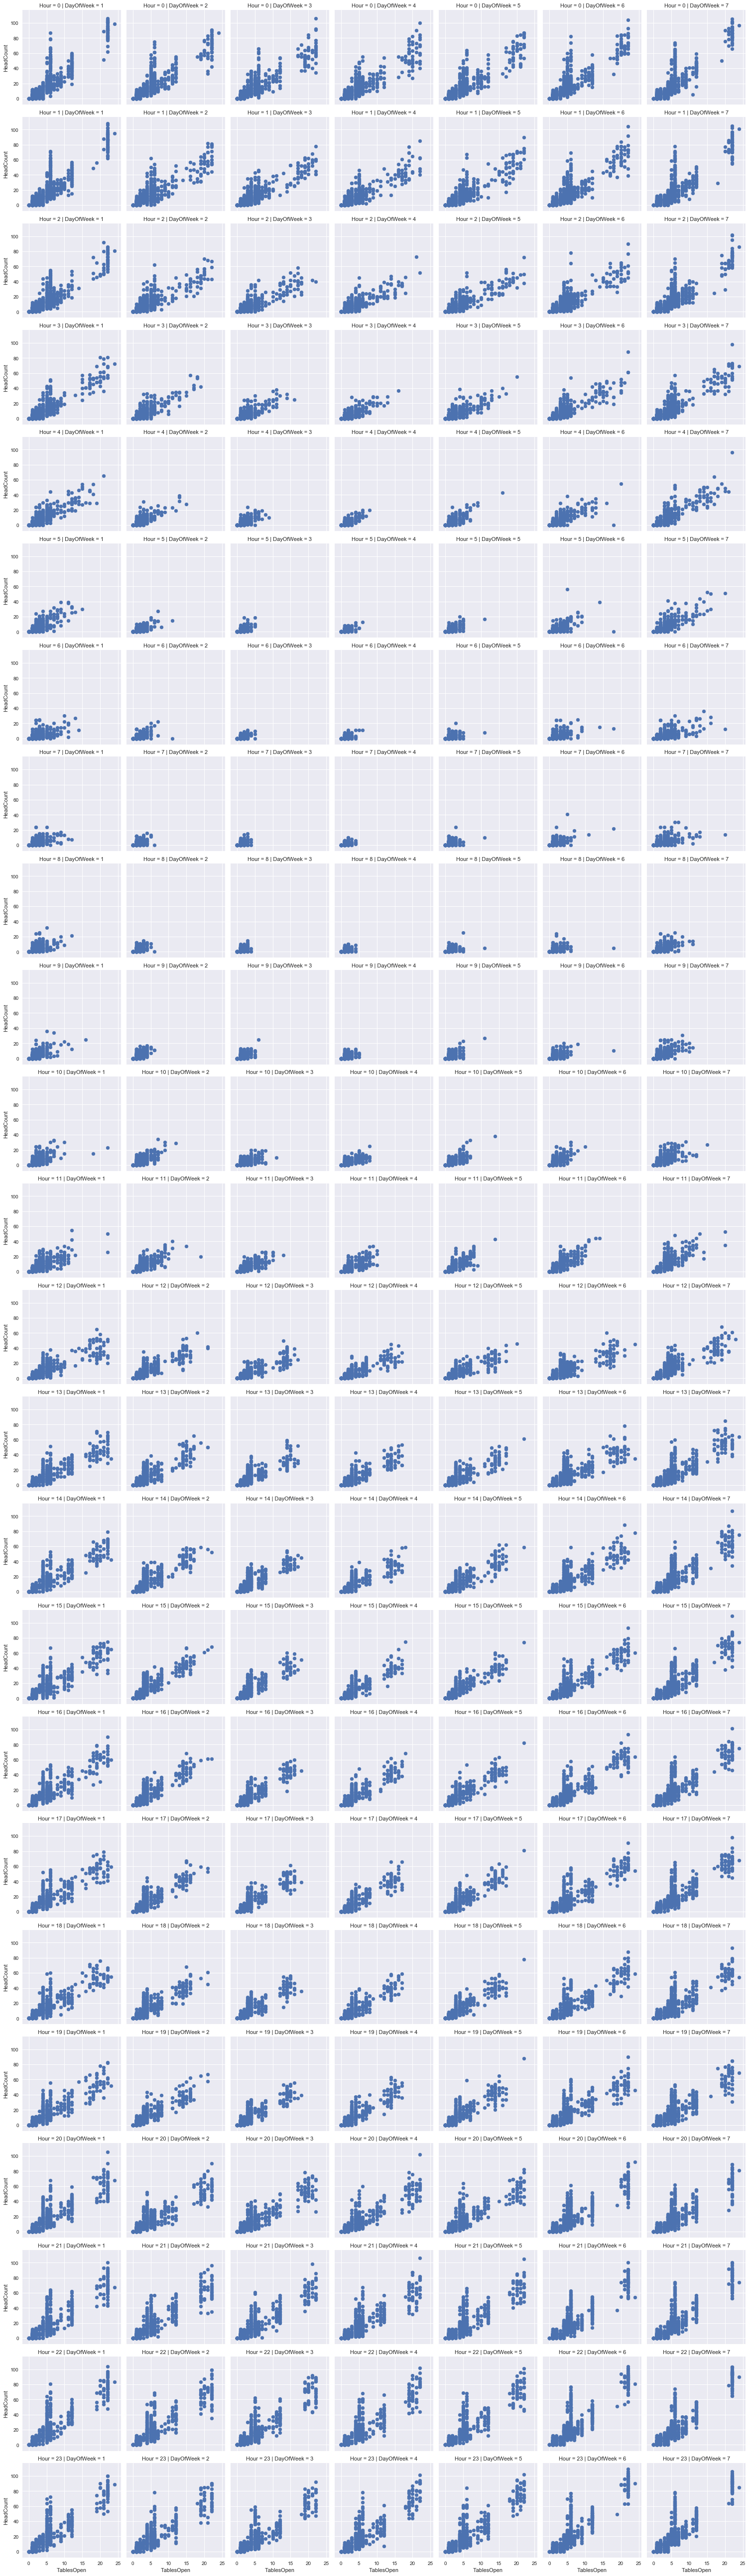

In [79]:
g = sns.FacetGrid(headcount_df, 
                  col="DayOfWeek", 
                  row='Hour', 
                  #hue="", 
                  palette="Set1")
g = g.map(plt.scatter, "TablesOpen", "HeadCount")

These plots are use 'day of week' as the different columns and 'hour' as the rows, also as the conditioning grids. It then plots the 'tables open' versus the 'head count'. Overall, seems to have a weak positive linear relationship per conditions with some slight deviations. The highest headcountds tend to occur with high number of tables opened

In [39]:
headcount_df.loc[:, 'HeadBin'] = pd.cut(headcount_df.loc[:, 'HeadCount'], bins = 10, labels = range(10))
headcount_df.loc[:, 'HeadBin'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: HeadBin, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [45]:
head_bins = pd.crosstab(headcount_df.loc[:, 'HeadBin'], headcount_df.loc[:, 'DayOfWeek'])
num_heads = head_bins.apply(sum, axis=0)
head_bins = head_bins.div(num_heads, axis=1)
print(head_bins.head())

DayOfWeek         1         2         3         4         5         6  \
HeadBin                                                                 
0          0.746953  0.813297  0.841698  0.848781  0.833654  0.776715   
1          0.138550  0.107818  0.093622  0.088639  0.094992  0.121752   
2          0.050473  0.038104  0.030396  0.028704  0.033734  0.043080   
3          0.023372  0.017714  0.016140  0.016758  0.016306  0.021099   
4          0.016758  0.010707  0.009150  0.007898  0.010256  0.016335   

DayOfWeek         7  
HeadBin              
0          0.727145  
1          0.138449  
2          0.061239  
3          0.025977  
4          0.016130  


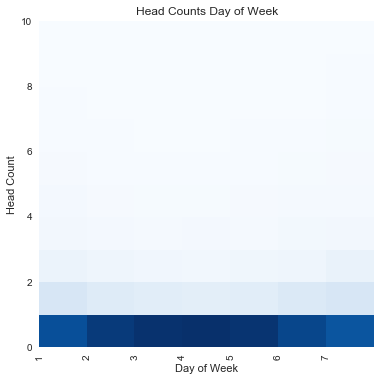

In [46]:
ax = plt.figure(figsize=(6,6)).gca()
ax.pcolor(head_bins, cmap='Blues')
ax.set_xticks(range(head_bins.shape[1]))
ax.set_xticklabels(head_bins.columns, rotation=90)
ax.set_xlabel('Day of Week')
ax.set_ylabel('Head Count')
ax.set_title('Head Counts Day of Week')